In [2]:
import pandas as pd
import numpy as np
import pandas_profiling as pp
import sweetviz as sv

In [3]:
Salary_data=pd.read_csv("Salary_Data.csv")
Salary_data.head(5)

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
#Structure of data
type(Salary_data)
Salary_data.shape

(30, 2)

In [5]:
#data types
Salary_data.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [6]:
#Checking Null values
Salary_data.isnull().sum()

#NO Null Values

YearsExperience    0
Salary             0
dtype: int64

In [7]:

Salary_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [8]:
#Count of duplicated rows
Salary_data[Salary_data.duplicated()].shape

(0, 2)

In [9]:
#Print the duplicated rows
Salary_data[Salary_data.duplicated()]

#NO Duplicate values in any rows 

,YearsExperience,Salary


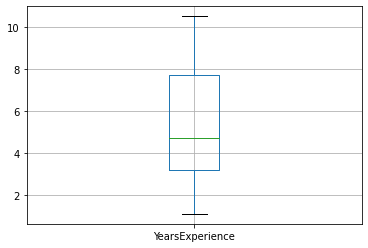

In [10]:
#Box plot
Salary_data.boxplot(column=['YearsExperience'])
#No outliers in YearsExperience column

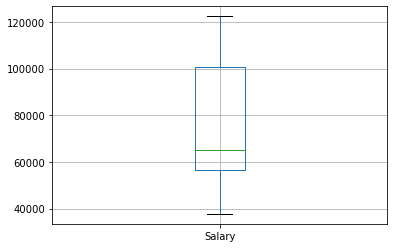

In [11]:
#Box plot
Salary_data.boxplot(column=['Salary'])
#No outliers in Salary column

In [12]:
#Descriptive stat of Salary
Salary_data['Salary'].describe()

count        30.000000
mean      76003.000000
std       27414.429785
min       37731.000000
25%       56720.750000
50%       65237.000000
75%      100544.750000
max      122391.000000
Name: Salary, dtype: float64

In [13]:
#Descriptive stat of YearExperience
Salary_data['YearsExperience'].describe()

count    30.000000
mean      5.313333
std       2.837888
min       1.100000
25%       3.200000
50%       4.700000
75%       7.700000
max      10.500000
Name: YearsExperience, dtype: float64

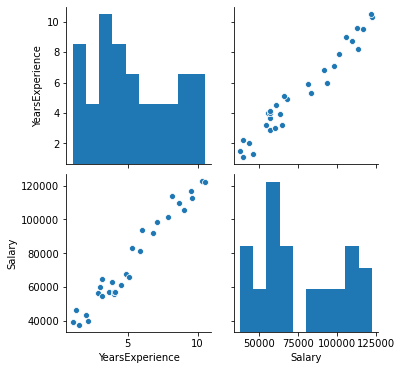

In [14]:
# Seaborn visualization library
import seaborn as sns
# Create the default pairplot
sns.pairplot(Salary_data)

In [15]:
Salary_data.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [19]:
#Building our first model
import statsmodels.formula.api as smf
model1=smf.ols("Salary~YearsExperience",data=Salary_data).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           1.14e-20
Time:                        14:55:10   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
pred_Model1=model1.predict(Salary_data.YearsExperience)
from ml_metrics import rmse
rmse(pred_Model1,Salary_data.Salary)

5592.043608760663

In [22]:
#Predicted Salary Hike using Years of Experience by first model
pred_Model1.head()

0    36187.158752
1    38077.151217
2    39967.143681
3    44692.124842
4    46582.117306
dtype: float64

Text(0, 0.5, 'Salary')

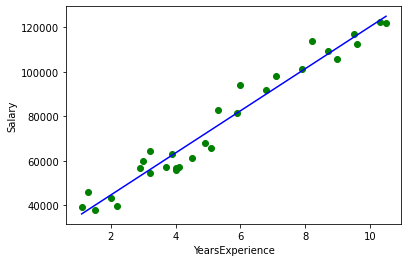

In [34]:
# Visualization of regresion line over the scatter plot YearsofExperience and Salary
plt.scatter(x=Salary_data['YearsExperience'],y=Salary_data['Salary'],color='green');plt.plot(Salary_data['YearsExperience'],pred_Model1,color='blue');plt.xlabel('YearsExperience');plt.ylabel('Salary')

In [23]:
#Building our second model(log transformation)
import statsmodels.formula.api as smf
model2=smf.ols("Salary~np.log(YearsExperience)",data=Salary_data).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     163.6
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           3.25e-13
Time:                        14:57:25   Log-Likelihood:                -319.77
No. Observations:                  30   AIC:                             643.5
Df Residuals:                      28   BIC:                             646.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                1.493e+04   5156.226      2.895      0.007    4365.921    2.55e+04
np.log(YearsExperience)  4.058e+04   3172.453     12.792      0.000    3.41e+04    4.71e+04
==============================================================================
Omnibus:                        1.094   Durbin-Watson:                   0.512
Prob(Omnibus):                  0.579   Jarque-Bera (JB):                0.908
Skew:                           0.156   Prob(JB):                        0.635
Kurtosis:                       2.207   Cond. No.                         5.76
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
#Building our third model(Exponential transformation)
import statsmodels.formula.api as smf
model3=smf.ols("np.log(Salary)~YearsExperience",data=Salary_data).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(Salary)   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.930
Method:                 Least Squares   F-statistic:                     383.6
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           7.03e-18
Time:                        14:59:12   Log-Likelihood:                 28.183
No. Observations:                  30   AIC:                            -52.37
Df Residuals:                      28   BIC:                            -49.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.5074      0.038    273.327      0.000      10.429      10.586
YearsExperience     0.1255      0.006     19.585      0.000       0.112       0.139
==============================================================================
Omnibus:                        0.826   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.661   Jarque-Bera (JB):                0.812
Skew:                           0.187   Prob(JB):                        0.666
Kurtosis:                       2.286   Cond. No.                         13.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
#Building our fourth model(Quadratic model)
Salary_data["YearsExperience_sq"] = Salary_data.YearsExperience*Salary_data.YearsExperience
model4=smf.ols("Salary~YearsExperience+YearsExperience_sq",data=Salary_data).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.954
Method:                 Least Squares   F-statistic:                     300.3
Date:                Mon, 28 Sep 2020   Prob (F-statistic):           3.59e-19
Time:                        15:29:03   Log-Likelihood:                -301.43
No. Observations:                  30   AIC:                             608.9
Df Residuals:                      27   BIC:                             613.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           2.621e+04   4554.674      5.756      0.000    1.69e+04    3.56e+04
YearsExperience     9259.2839   1811.007      5.113      0.000    5543.405     1.3e+04
YearsExperience_sq    16.3926    152.121      0.108      0.915    -295.734     328.520
==============================================================================
Omnibus:                        2.181   Durbin-Watson:                   1.649
Prob(Omnibus):                  0.336   Jarque-Bera (JB):                1.627
Skew:                           0.384   Prob(JB):                        0.443
Kurtosis:                       2.156   Cond. No.                         223.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
#Storing R^2 values in a data frame
rsqr_model1=model1.rsquared
rsqr_model2=model2.rsquared
rsqr_model3=model3.rsquared
rsqr_model4=model4.rsquared

d1={'Model':['model1','model2','model3','model4'],'R^2 values':[rsqr_model1,rsqr_model2,rsqr_model3,rsqr_model4]}
rsqr_frame=pd.DataFrame(d1)
rsqr_frame
#After Analysis of all 4 models we conclude model1 has highest R^2 as well as Adj.R^2 value so we choose model1 as our final model 

,Model,R^2 values
0,model1,0.956957
1,model2,0.853889
2,model3,0.956975
3,model4,0.956975


Text(0, 0.5, 'Standardized Residual')

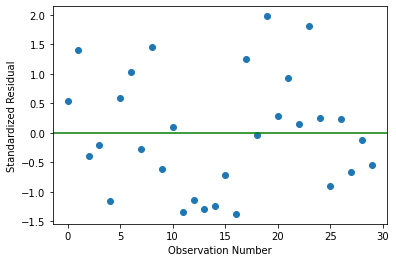

In [36]:
# so we will conclude the model1 has highest R^2 value 
# getting residuals of the entire data set
from matplotlib import pyplot as plt
resid = model1.resid_pearson 
resid
plt.plot(model1.resid_pearson,'o');plt.axhline(y=0,color='green');plt.xlabel("Observation Number");plt.ylabel("Standardized Residual")

Text(0, 0.5, 'Actual Salary')

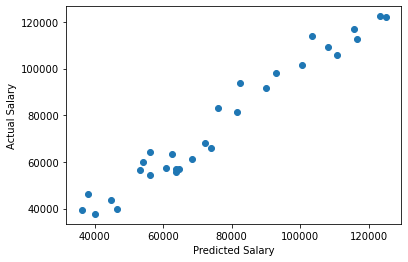

In [35]:
# Predicted vs actual values
plt.scatter(x=pred_Model1,y=Salary_data.Salary);plt.xlabel("Predicted Salary");plt.ylabel("Actual Salary")